<a href="https://colab.research.google.com/github/oluwaseuno25/OLUWASEUN_INFO5502_-Summer2022/blob/main/Lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

# read the data and display the first 5 rows
train_df = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv', header=0)
print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")
train_df.head()


Number of samples: 9174 and number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df.describe()


def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
train_df['hour'] = train_df['datetime'].map(hour_of_day)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [5]:
hours = np.unique(train_df['hour'])
print("hours:",hours)

hours = np.unique(train_df['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

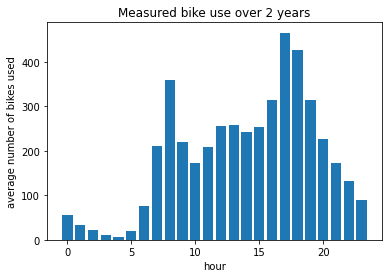

In [6]:
# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

In [7]:
# PICK THE FEATURES AND MODEL
# pick your features
cols = ['hour'] # clearly a simple model
# try more features later, like...
# cols = ['hour','season']

# pick your model (you should consider adjusting optional parameters too)
# reading in a few models we can pick from (there are many others)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [9]:
#pick one by commenting/uncommenting
model = DecisionTreeRegressor()
#model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors = 5)
#model = svm.LinearSVR()
#model = RandomForestRegressor(n_estimators = 1)

print("columns selected for later:",cols)
print(model) # to get an idea of parameters and confirm model chosensen

columns selected for later: ['hour']
DecisionTreeRegressor()


In [10]:
# SEPERATE TRAINING AND TEST SETS
n = len(train_df) # get number of rows in the training set
training_size = 0.75 # fraction of training data to split off for internal testing

# set up separate training and testing sets
# in this case using shuffled array indices
# there are many more ways to do this too
indices = np.array(range(n)) # makes an array of row indices in order
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]

In [11]:
# now use those shuffled indices to separating training from test dataframes
new_train_df = train_df.iloc[mytrain_i]
new_test_df = train_df.iloc[mytest_i]

print("samples in the new training subset:",len(new_train_df))
print("samples in the new test subset:",len(new_test_df))

samples in the new training subset: 6880
samples in the new test subset: 2294


In [12]:
#FIT THE MODEL TO A PROPORTION OF TRAINING SET, TEST ON THE REST AND EVALUATE
# fit the model to the training subset of original training data
model.fit(new_train_df[cols], new_train_df['count'])

DecisionTreeRegressor()

In [13]:
# predict on the testing subset of the original training data
pred_count = model.predict(new_test_df[cols])

In [14]:
# score the model on the new test set
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(new_test_df['count'],pred_count))
print("RMS error:",rms)

RMS error: 127.91471816624626


In [15]:
# CREATING THE TEST FILE OUTPUT
# read in the test data
test_df = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv', header=0)
print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")



Number of samples: 9174 and number of features: 12 



In [17]:
# must add that new feature into the test data too, to use it in prediction
test_df['hour'] = test_df['datetime'].map(hour_of_day)

# show the test data output to be sure it read in correctly and added the column
test_df.head()
# fit the selected model TO YOUR FULL TRAINING SET
model.fit( train_df[cols], train_df['count'])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning)
pred_count = model.predict(test_df[cols])

# add the prediction column (in case you want to inspect it later)
test_df['count'] = pred_count

# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv1', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv1")


Prediction complete. Saved as my_prediction.csv1


In [60]:
#Question2

# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime

# Import dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/portfolio_data.csv', index_col='Date', parse_dates=True)
# Test if missing values exist

df.isna().any()

AMZN    False
DPZ     False
BTC     False
NFLX    False
dtype: bool

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1520 entries, 2013-05-01 to 2019-05-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1520 non-null   float64
 1   DPZ     1520 non-null   float64
 2   BTC     1520 non-null   float64
 3   NFLX    1520 non-null   float64
dtypes: float64(4)
memory usage: 59.4 KB


In [55]:
df.head()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-06-27,277.549988,55.273243,94.660004,30.709999
2013-06-28,277.690002,54.662239,95.000000,30.155714
2013-07-01,282.100006,56.316673,90.410004,32.040001
2013-07-02,283.730011,56.532871,78.889999,31.637142
2013-07-03,284.029999,56.617470,80.040001,31.558571


In [56]:


# Split training and testing datasets

df_test = df.head(40)
df = df[40:]
 

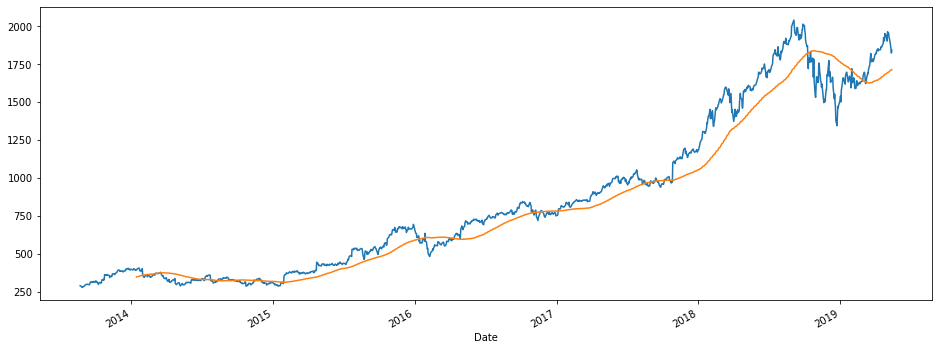

In [57]:
#Moving average

df['AMZN'].plot(figsize=(16, 6))
df.rolling(100).mean()['AMZN'].plot()


In [58]:
training_df = df['AMZN']
training_df = pd.DataFrame(training_df)


In [59]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_df_scaled = sc.fit_transform(training_df)

In [65]:
# Create structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1440):
    X_train.append(training_df_scaled[i-60:i, 0])
    y_train.append(training_df_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[5.16326634e-03],
        [3.00242124e-03],
        [0.00000000e+00],
        ...,
        [4.28129555e-02],
        [4.91703534e-02],
        [5.01768581e-02]],

       [[3.00242124e-03],
        [0.00000000e+00],
        [3.69612980e-04],
        ...,
        [4.91703534e-02],
        [5.01768581e-02],
        [4.84766113e-02]],

       [[0.00000000e+00],
        [3.69612980e-04],
        [1.73436407e-03],
        ...,
        [5.01768581e-02],
        [4.84766113e-02],
        [4.77715021e-02]],

       ...,

       [[7.72822387e-01],
        [7.62956487e-01],
        [7.54597428e-01],
        ...,
        [9.32610397e-01],
        [9.30773699e-01],
        [9.20595018e-01]],

       [[7.62956487e-01],
        [7.54597428e-01],
        [7.65759846e-01],
        ...,
        [9.30773699e-01],
        [9.20595018e-01],
        [9.14971154e-01]],

       [[7.54597428e-01],
        [7.65759846e-01],
        [7.62643707e-01],
        ...,
        [9.20595018e-01],
        [9.1497

In [40]:
# Import Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [41]:
# Initialize RNN

regressor = Sequential()

In [66]:
# First LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Second LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Thirs LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

              
# Output layer

regressor.add(Dense(units = 1))

In [67]:
#Compile RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fit RNN

regressor.fit(X_train, y_train, epochs = 20, batch_size = 5)

Epoch 1/20
276/276 [==============================] - 27s 69ms/step - loss: 0.0066
Epoch 2/20
276/276 [==============================] - 26s 95ms/step - loss: 0.0039
Epoch 3/20
276/276 [==============================] - 19s 68ms/step - loss: 0.0035
Epoch 4/20
276/276 [==============================] - 20s 73ms/step - loss: 0.0037
Epoch 5/20
276/276 [==============================] - 20s 72ms/step - loss: 0.0030
Epoch 6/20
276/276 [==============================] - 24s 86ms/step - loss: 0.0022
Epoch 7/20
276/276 [==============================] - 28s 101ms/step - loss: 0.0020
Epoch 8/20
276/276 [==============================] - 23s 84ms/step - loss: 0.0027
Epoch 9/20
276/276 [==============================] - 24s 88ms/step - loss: 0.0021
Epoch 10/20
276/276 [==============================] - 24s 85ms/step - loss: 0.0022
Epoch 11/20
276/276 [==============================] - 19s 70ms/step - loss: 0.0020
Epoch 12/20
276/276 [==============================] - 19s 68ms/step - loss: 0.0018


In [68]:
real_stock_price = df_test['AMZN'].values
real_stock_price

array([277.549988, 277.690002, 282.100006, 283.730011, 284.029999,
       285.880005, 290.589996, 291.529999, 292.329987, 299.660004,
       307.549988, 306.570007, 306.869995, 308.690002, 304.109985,
       305.230011, 303.480011, 301.059998, 298.940002, 303.399994,
       312.01001 , 306.100006, 302.410004, 301.220001, 305.570007,
       304.209991, 300.98999 , 300.75    , 296.910004, 295.73999 ,
       297.26001 , 296.690002, 293.970001, 291.339996, 286.470001,
       284.820007, 285.570007, 287.089996, 284.570007, 289.730011])

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2013-06-27 to 2013-08-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    40 non-null     float64
 1   DPZ     40 non-null     float64
 2   BTC     40 non-null     float64
 3   NFLX    40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [72]:
test_set = df_test['AMZN']
test_set = pd.DataFrame(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2013-06-27 to 2013-08-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [69]:
df_total = pd.concat((df['AMZN'], df_test['AMZN']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price = predicted_stock_price.values
predicted_stock_price

array([[1860.8679 ],
       [1755.3754 ],
       [1580.6617 ],
       [1369.0186 ],
       [1149.4725 ],
       [ 943.7067 ],
       [ 765.77655],
       [ 622.53094],
       [ 514.4725 ],
       [ 437.57895],
       [ 385.7949 ],
       [ 352.78986],
       [ 332.58203],
       [ 320.34726],
       [ 312.7689 ],
       [ 307.53802],
       [ 303.469  ],
       [ 300.00037],
       [ 296.87418],
       [ 294.00488],
       [ 291.69394],
       [ 290.53333],
       [ 290.34372],
       [ 290.5849 ],
       [ 290.8514 ],
       [ 291.20624],
       [ 291.65616],
       [ 292.01773],
       [ 292.20016],
       [ 292.04883],
       [ 291.5371 ],
       [ 290.86533],
       [ 290.2004 ],
       [ 289.51907],
       [ 288.7103 ],
       [ 287.57028],
       [ 286.07037],
       [ 284.42545],
       [ 282.94952],
       [ 281.70816]], dtype=float32)

In [75]:
real_stock_price

array([277.549988, 277.690002, 282.100006, 283.730011, 284.029999,
       285.880005, 290.589996, 291.529999, 292.329987, 299.660004,
       307.549988, 306.570007, 306.869995, 308.690002, 304.109985,
       305.230011, 303.480011, 301.059998, 298.940002, 303.399994,
       312.01001 , 306.100006, 302.410004, 301.220001, 305.570007,
       304.209991, 300.98999 , 300.75    , 296.910004, 295.73999 ,
       297.26001 , 296.690002, 293.970001, 291.339996, 286.470001,
       284.820007, 285.570007, 287.089996, 284.570007, 289.730011])

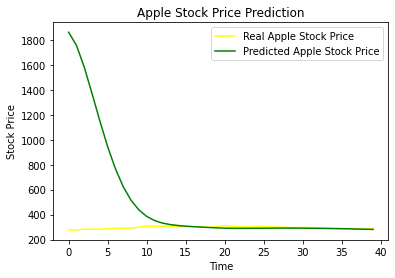

In [78]:
# Plot the results

plt.plot(real_stock_price, color = 'yellow', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()